In [71]:
import pandas as pd

In [72]:
test_data = pd.read_excel('Тестовое задание.xlsx')

# Часть 1

## Общая информация о данных

In [73]:
test_data

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260.0,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866.0,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163.0,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146.0,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823.0,3.283940,4.39674063521296
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,1.0,279.0,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,1.0,335.0,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1.0,1782.0,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,1.0,84.0,0.509490,4.151198803764073


In [74]:
test_data.isnull().sum()

area            1
cluster         1
cluster_name    1
keyword         1
good (1)        2
count           2
x               1
y               1
dtype: int64

In [75]:
test_data.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
good (1)        float64
count            object
x               float64
y                object
dtype: object

In [76]:
test_data['count'] = pd.to_numeric(test_data['count'], errors='coerce')
test_data['y'] = pd.to_numeric(test_data['y'], errors='coerce')

In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         225 non-null    float64
 6   x             228 non-null    float64
 7   y             227 non-null    float64
dtypes: float64(5), object(3)
memory usage: 14.4+ KB


## Удаление столбца и пустых строк.

Оставляем только необходимые столбцы и непустые строки.

In [78]:
test_data = test_data.drop(['good (1)'], axis = 1)
test_data = test_data.dropna(how = 'all')
test_data

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260.0,5.772342,12.564796
1,eligibility,0.0,Кластер 0,singles unusual buyers,866.0,14.829280,7.850729
2,eligibility,0.0,Кластер 0,hawaiian directive,163.0,11.381856,3.898137
3,eligibility,0.0,Кластер 0,dynamics directly,1146.0,9.980149,6.281428
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823.0,3.283940,4.396741
...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,279.0,10.971214,4.857810
225,greetings,2.0,Кластер 2,sapphire grounds,335.0,1.160626,3.642820
226,greetings,3.0,Кластер 3,entire ethical speakers,1782.0,7.985910,6.003699
227,greetings,3.0,Кластер 3,courtesy textiles diameter,84.0,0.509490,4.151199


## Сортировка

In [79]:
test_data.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending = [True, True, True, False], inplace = True)
test_data

,area,cluster,cluster_name,keyword,count,x,y
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220012
...,...,...,...,...,...,...,...
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.553368
105,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.651527
103,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906340


## Добавление столбца color

In [80]:
import random

Перечислим набор возможных цветов.

In [81]:
colo = ['#17becf','#bcbd22', '#7f7f7f', '#e377c2', '#8c564b', '#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']

Посмотрим сколько уникальных кластеров и областей.

In [82]:
test_data['cluster'].unique()

array([0., 1., 2., 3.])

In [83]:
areas = sorted(test_data['area'].unique())
areas

['ar\\vr',
 'available',
 'capability',
 'dialog',
 'eligibility',
 'except',
 'greetings',
 'housewives',
 'lithuania',
 'locator',
 'personnel',
 'protein',
 'twisted',
 'winner',
 'worlds']

Создадим список цветов соответстующий каждому кластеру в области.

In [84]:
color = []
for a in areas:
  col = colo.copy()
  cur_area = test_data.loc[test_data['area'] == a]

  for cluster in [0., 1., 2., 3.]:
    l = len(cur_area.loc[cur_area['cluster'] == cluster])
    new_color = col[random.randint(0,len(col) - 1)]
    col.remove(new_color)
    color = color + [new_color]*l  

Проверим количество элементов в столбце color (должно соответствовать длине таблицы - 228)

In [85]:
len(color)

228

In [86]:
test_data['color'] = color

In [87]:
test_data

,area,cluster,cluster_name,keyword,count,x,y,color
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#bcbd22
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#bcbd22
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#bcbd22
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#bcbd22
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220012,#8c564b
...,...,...,...,...,...,...,...,...
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994,#17becf
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.553368,#17becf
105,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.651527,#bcbd22
103,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906340,#bcbd22


## Удаление повторов

Удаление повторов словосочетаний в одной области.

In [88]:
test_data.drop_duplicates(subset=['area','keyword'], inplace = True)
test_data

,area,cluster,cluster_name,keyword,count,x,y,color
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#bcbd22
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#bcbd22
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#bcbd22
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#bcbd22
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220012,#8c564b
...,...,...,...,...,...,...,...,...
100,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994,#17becf
102,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.553368,#17becf
105,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.651527,#bcbd22
103,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906340,#bcbd22


## Сохранение подготовленных данных.

In [89]:
test_data.reset_index(drop = True, inplace = True)
test_data

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#bcbd22
1,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#bcbd22
2,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#bcbd22
3,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#bcbd22
4,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220012,#8c564b
...,...,...,...,...,...,...,...,...
216,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994,#17becf
217,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.553368,#17becf
218,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.651527,#bcbd22
219,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906340,#bcbd22


In [90]:
test_data

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#bcbd22
1,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#bcbd22
2,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#bcbd22
3,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#bcbd22
4,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397.0,10.474474,6.220012,#8c564b
...,...,...,...,...,...,...,...,...
216,worlds,2.0,Кластер 2,ringtone parental,471.0,11.723895,4.363994,#17becf
217,worlds,2.0,Кластер 2,recipient traffic,236.0,5.593629,0.553368,#17becf
218,worlds,3.0,Кластер 3,immunology plates,1653.0,2.407028,7.651527,#bcbd22
219,worlds,3.0,Кластер 3,holdings herbal,1476.0,3.986508,10.906340,#bcbd22


In [98]:
test_data.to_csv('test_data.csv')

# Часть 2

In [92]:
import matplotlib.pyplot as plt

In [93]:
import matplotlib.patches as mpatches

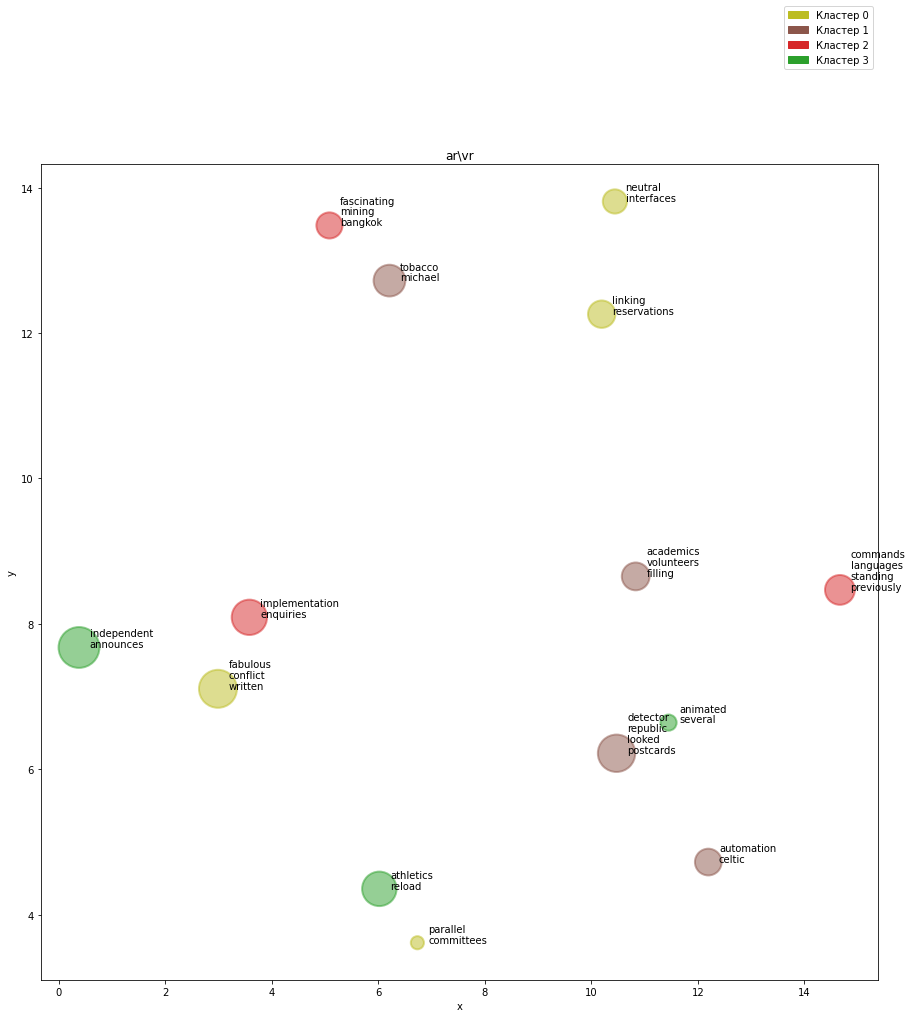

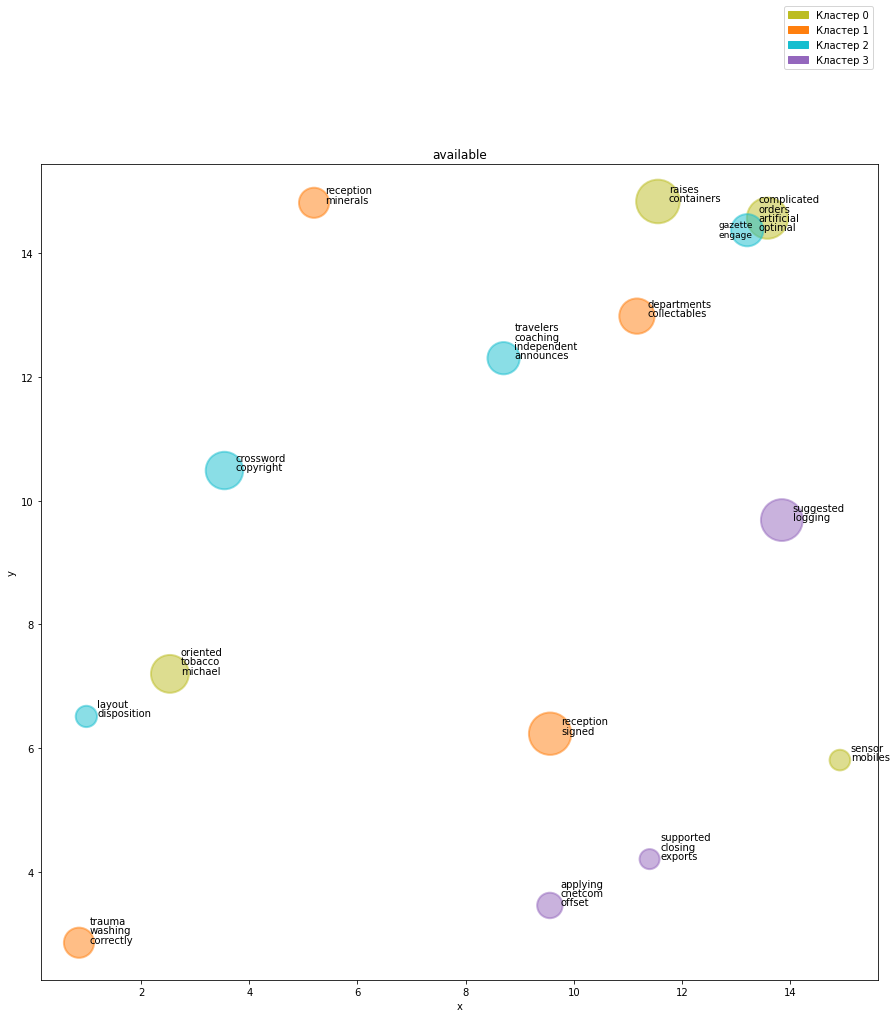

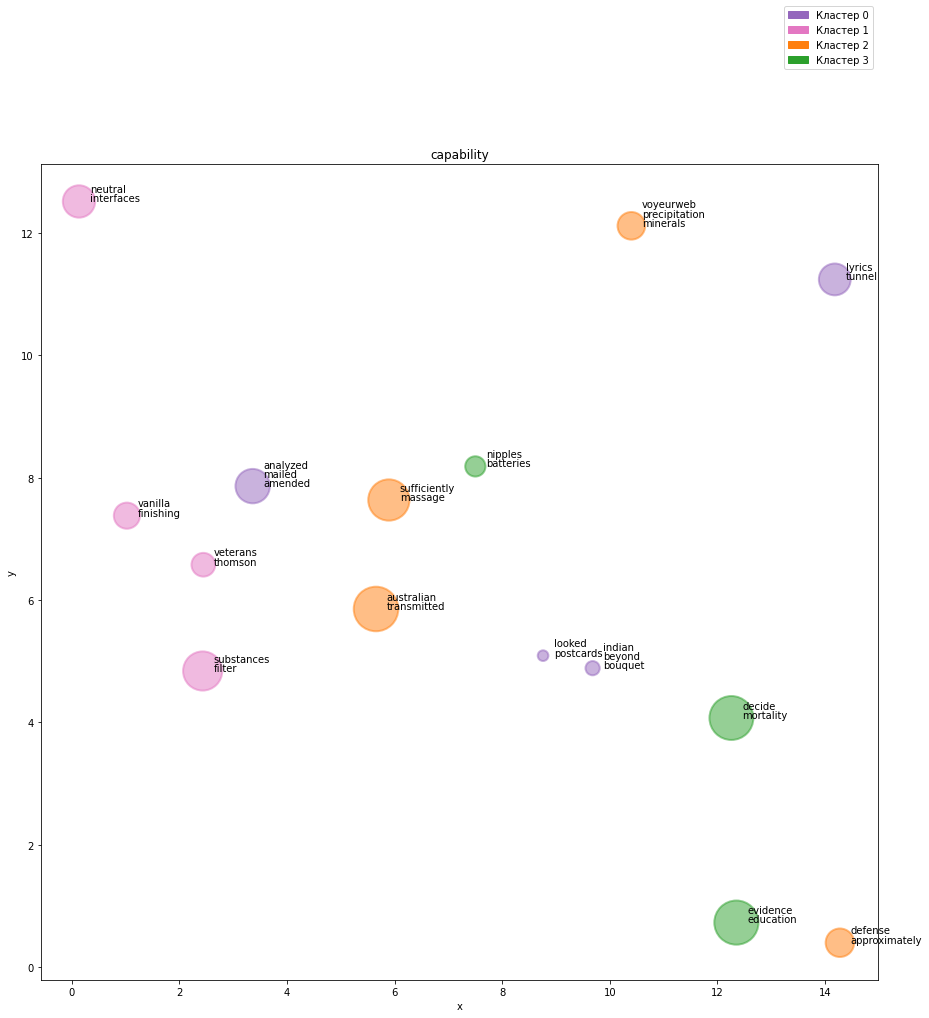

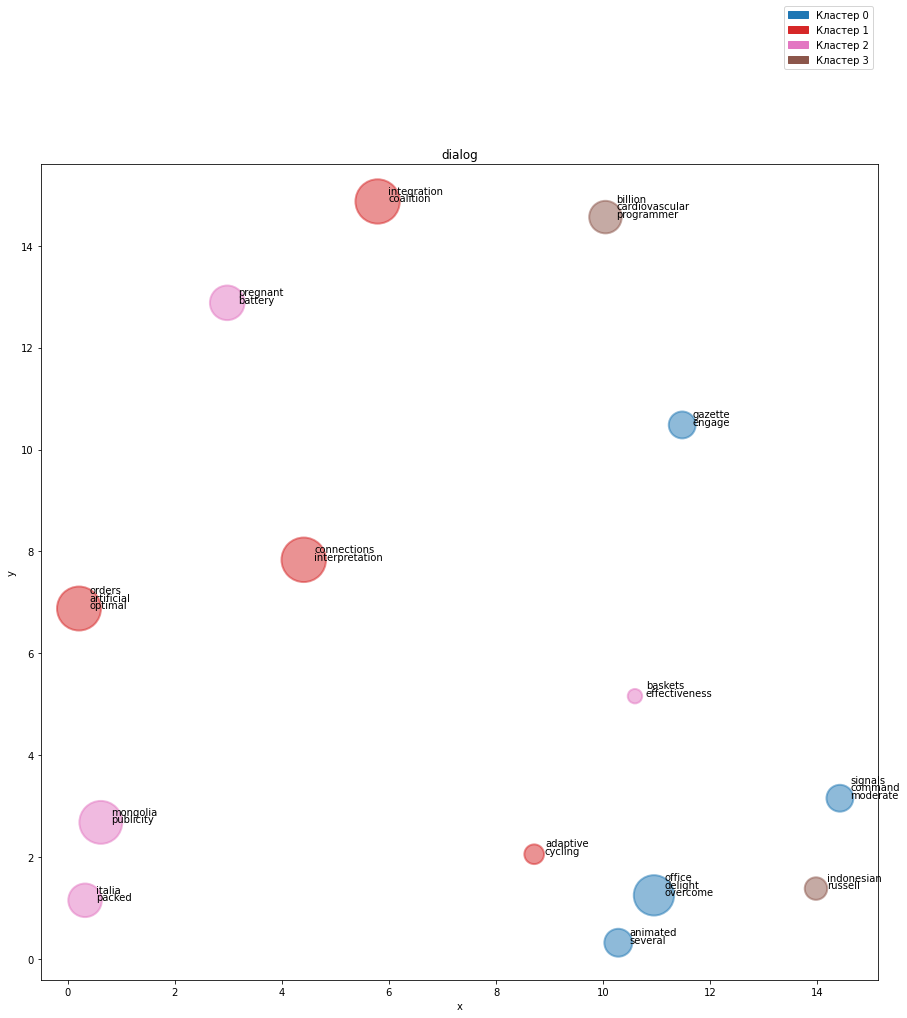

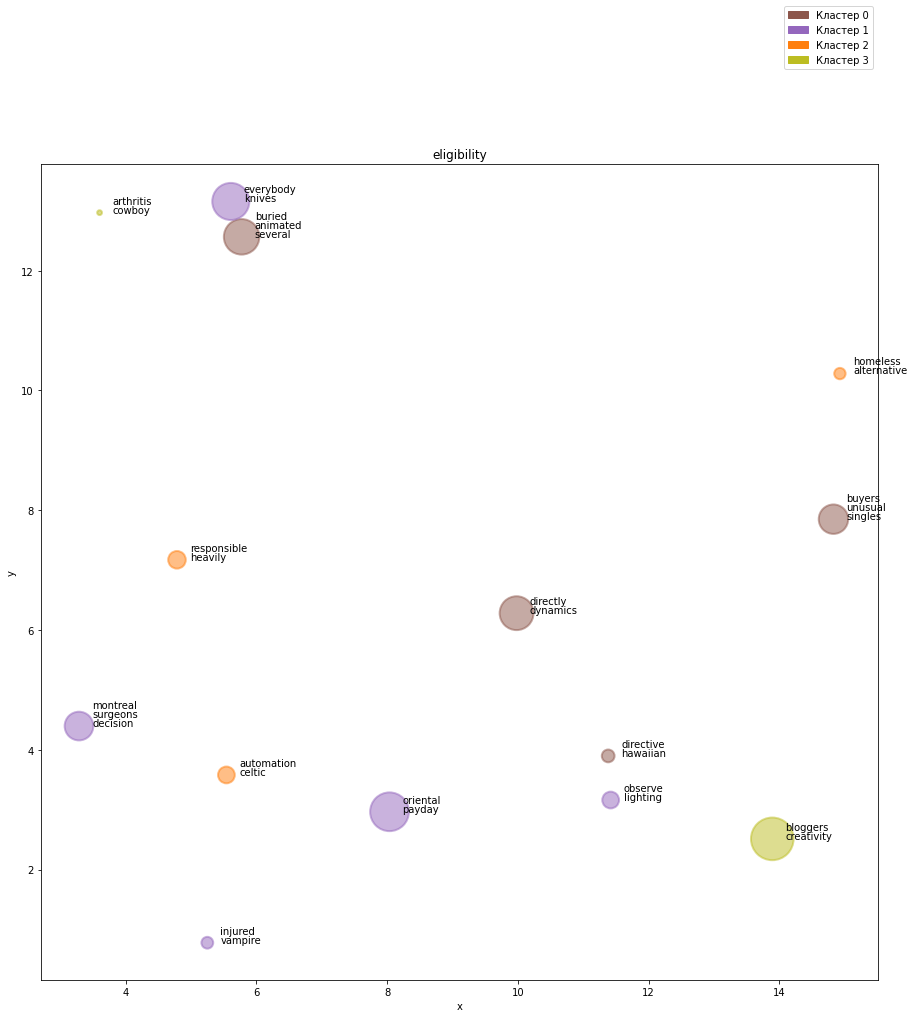

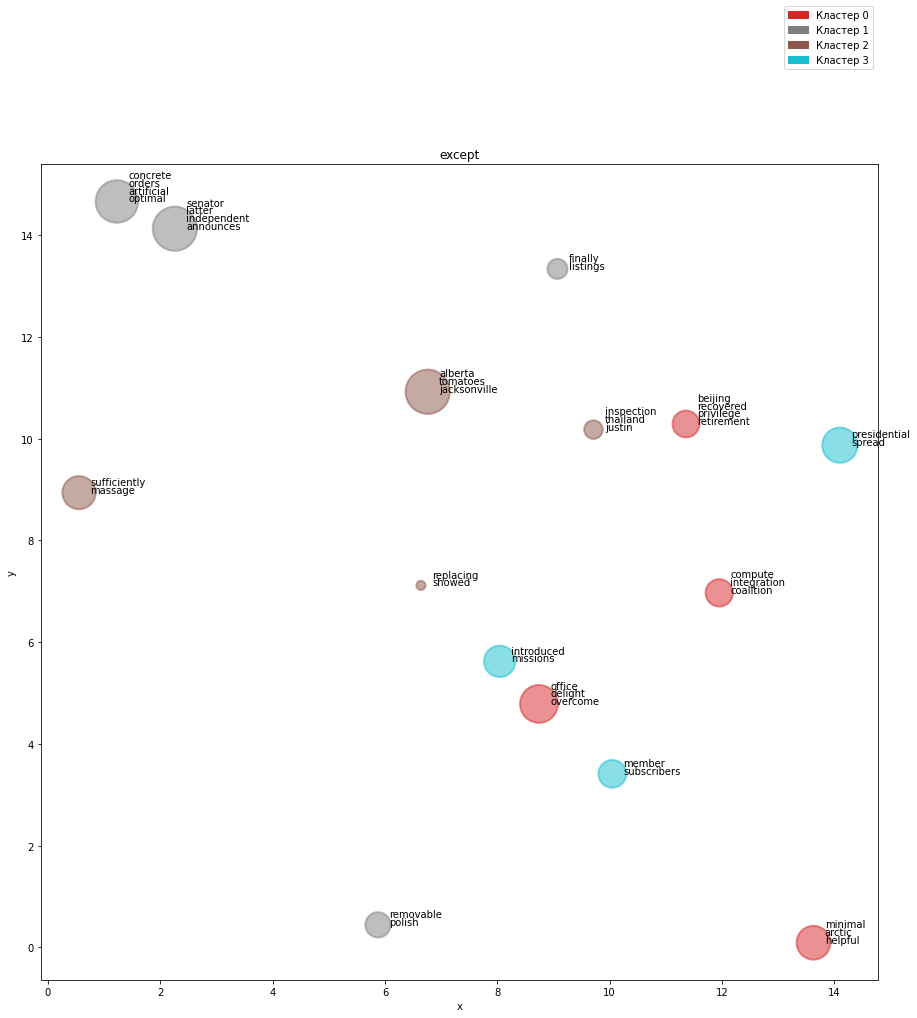

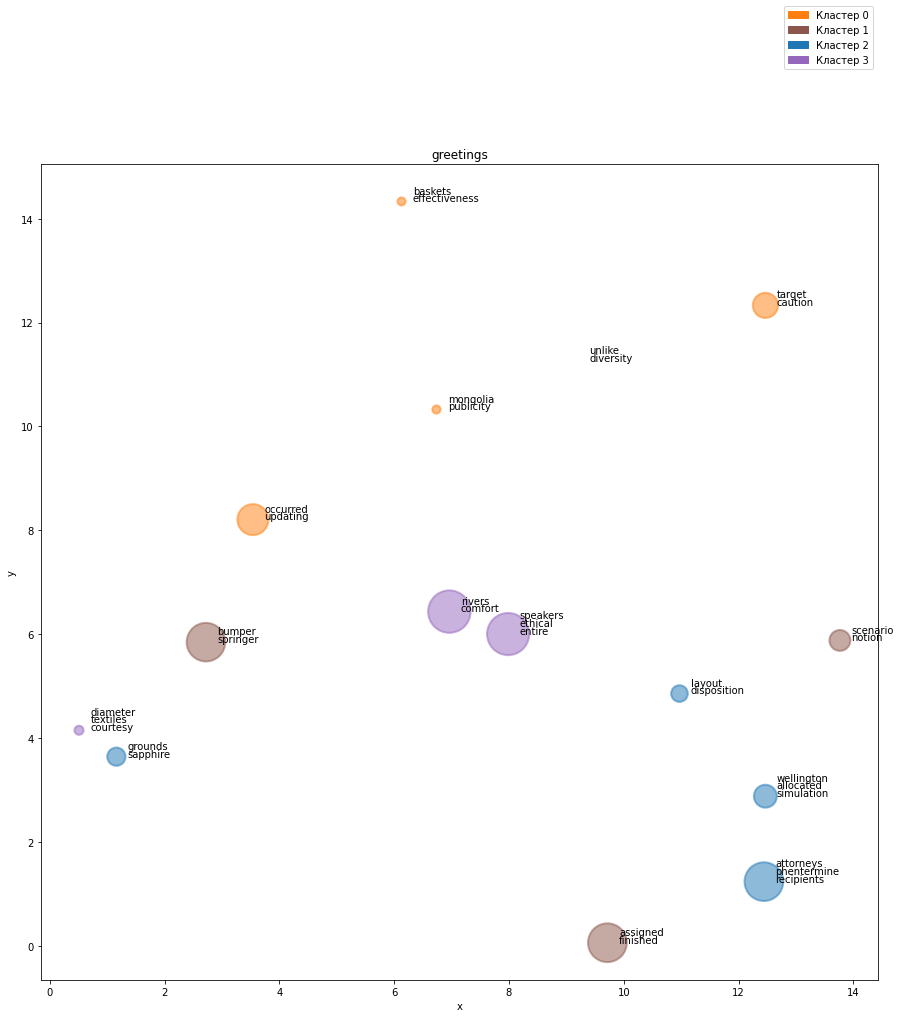

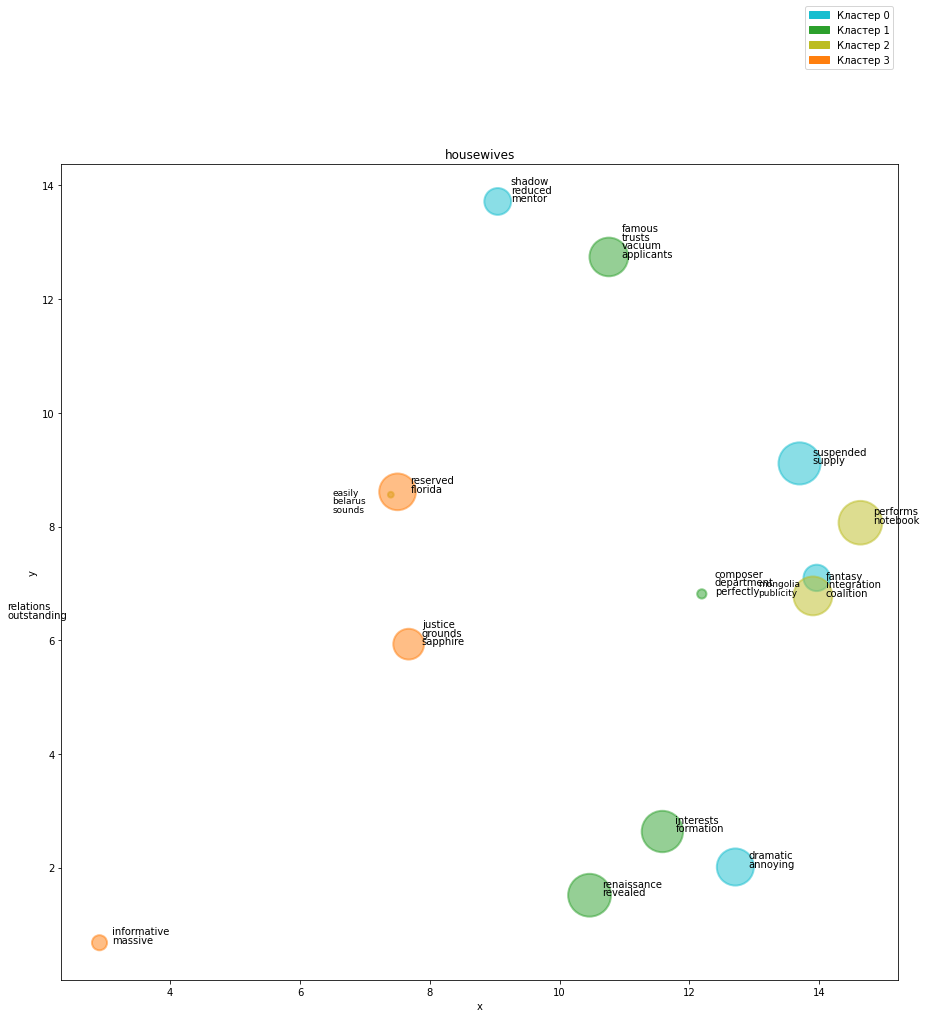

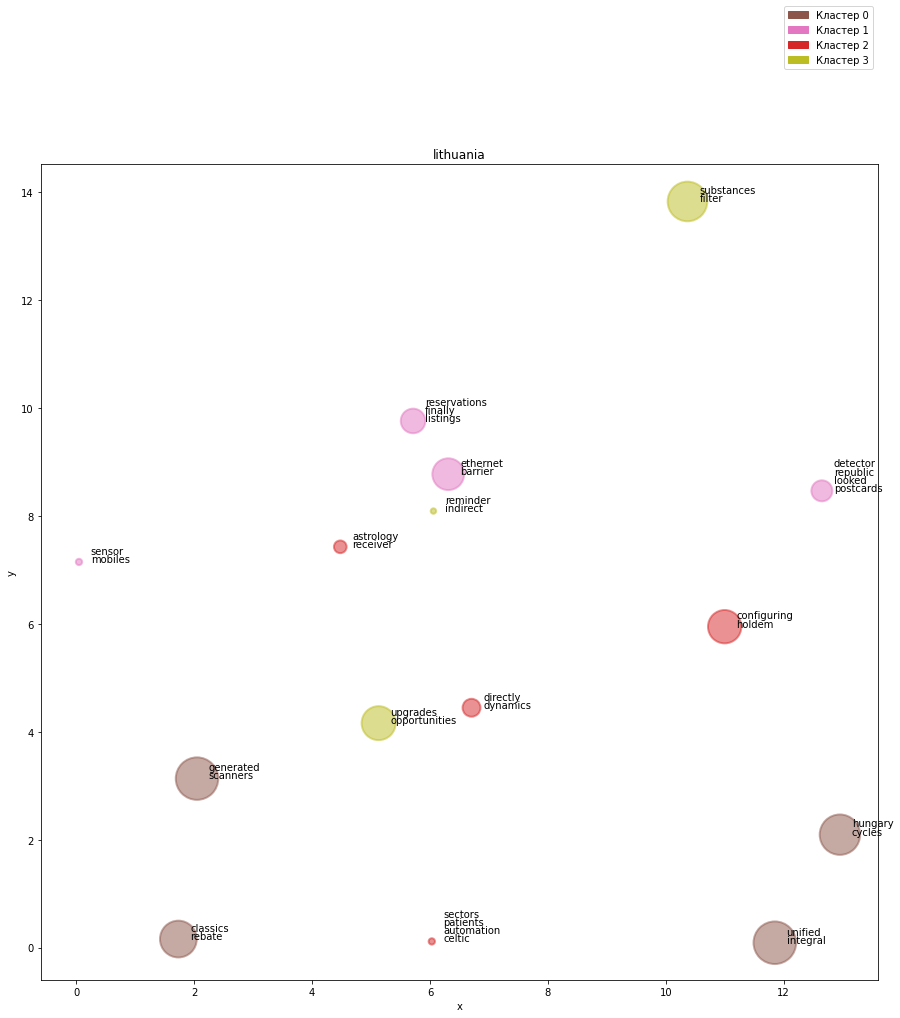

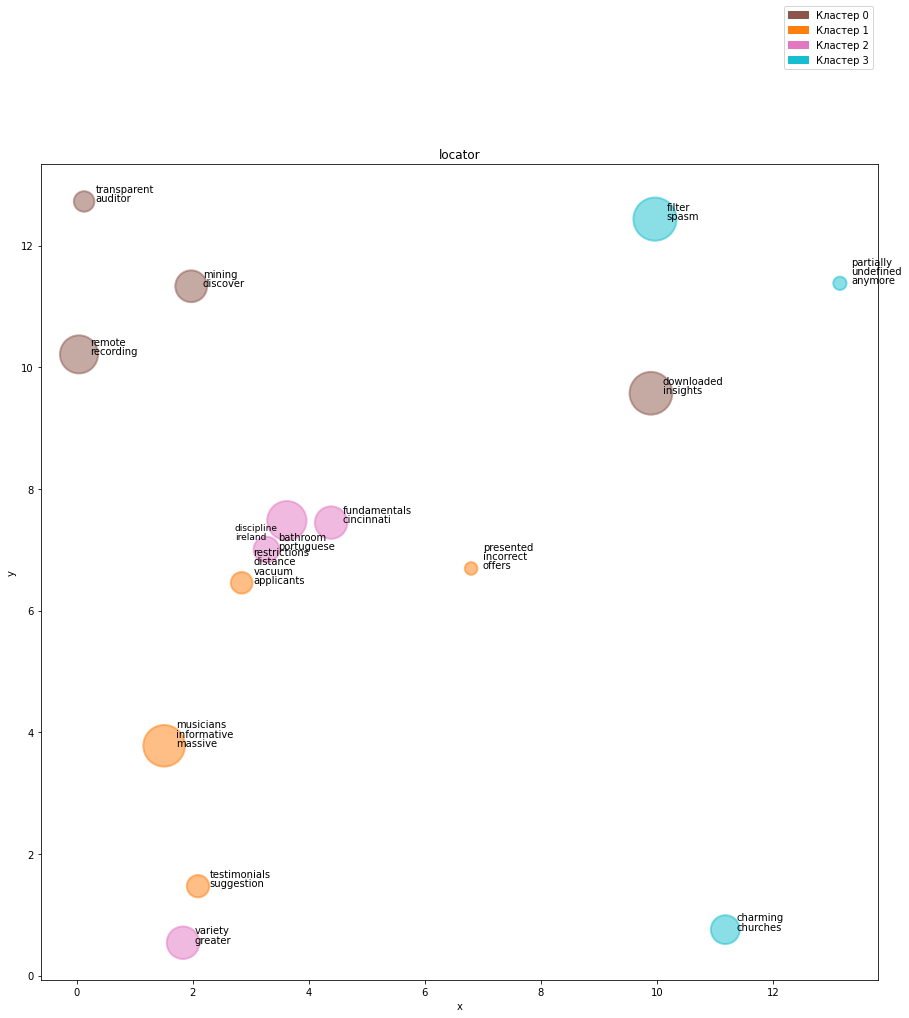

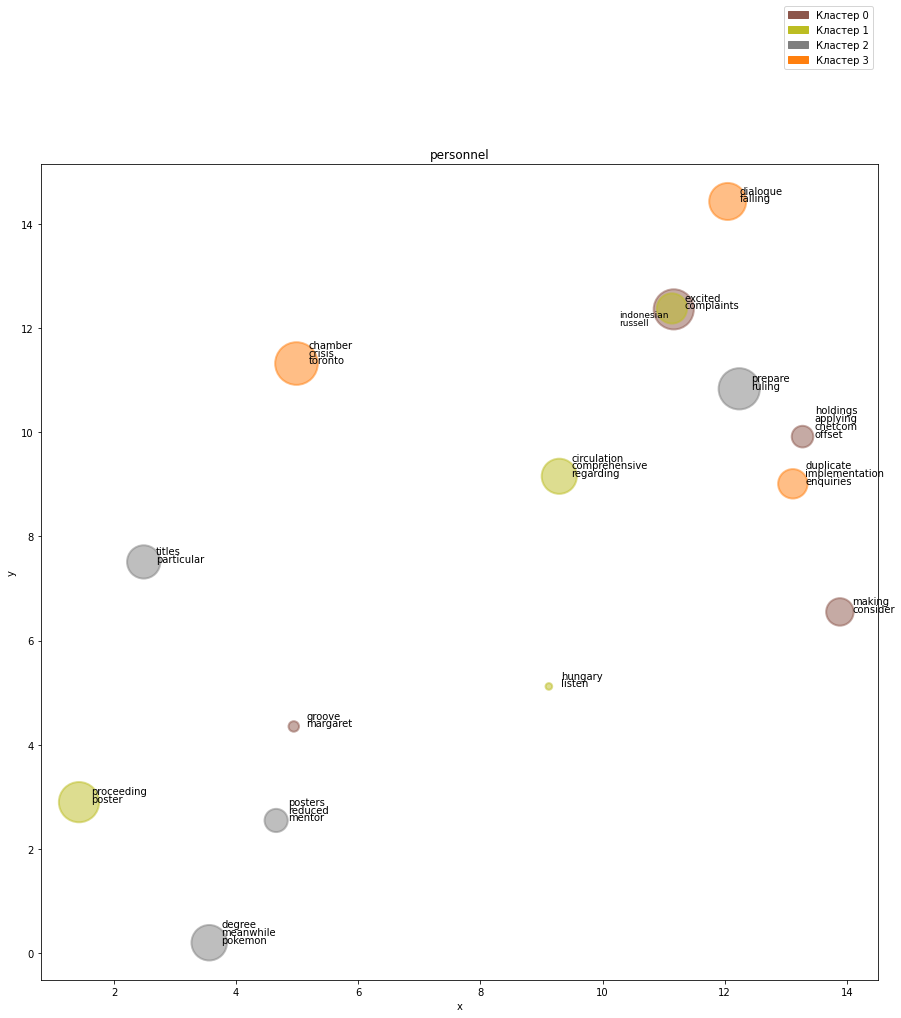

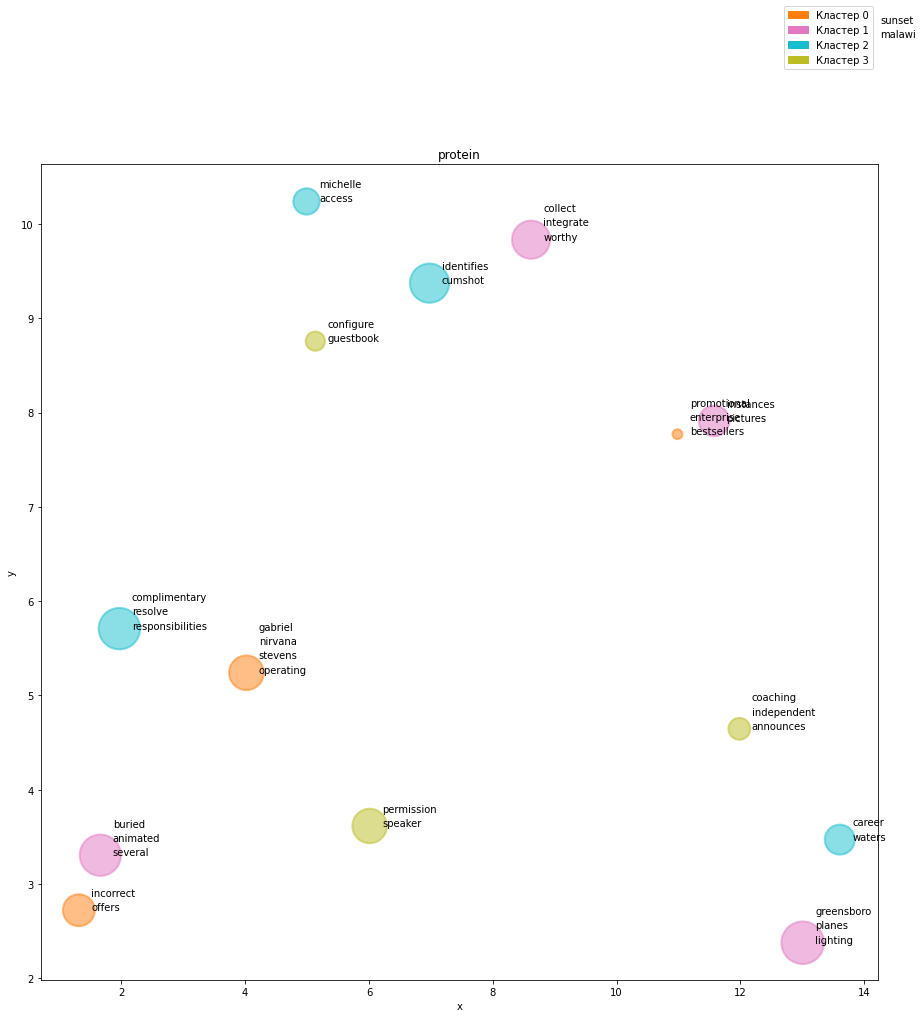

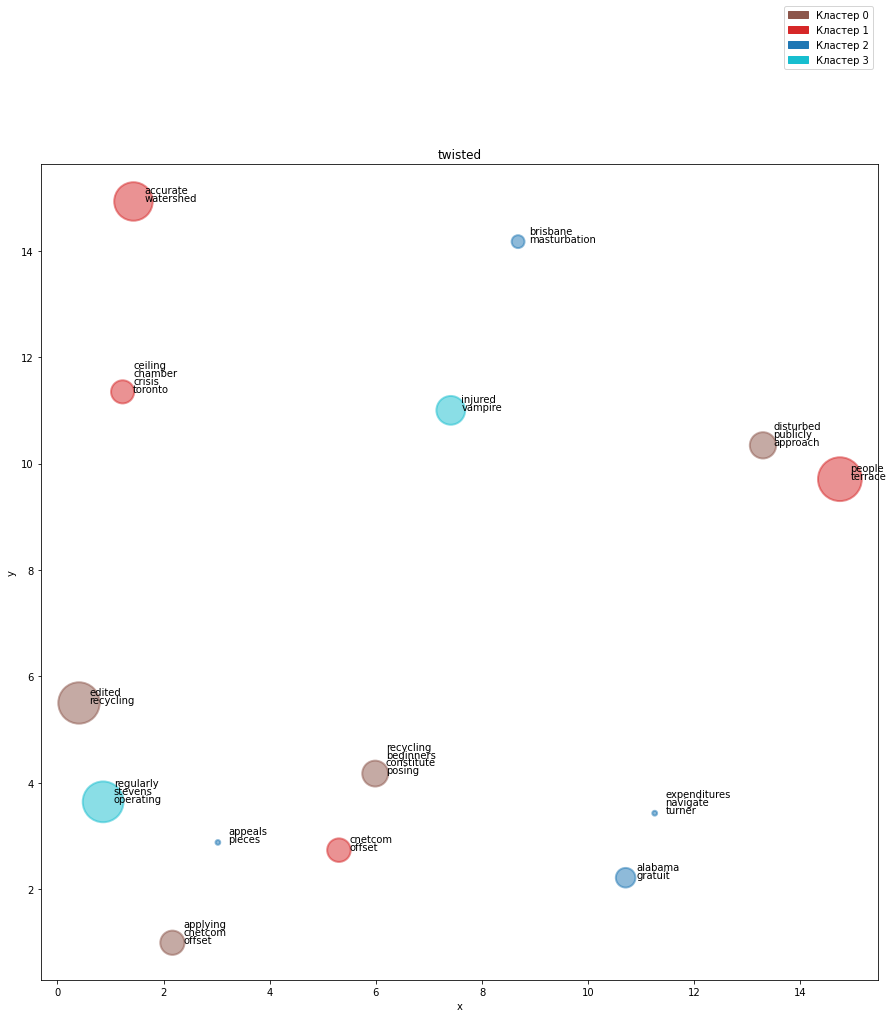

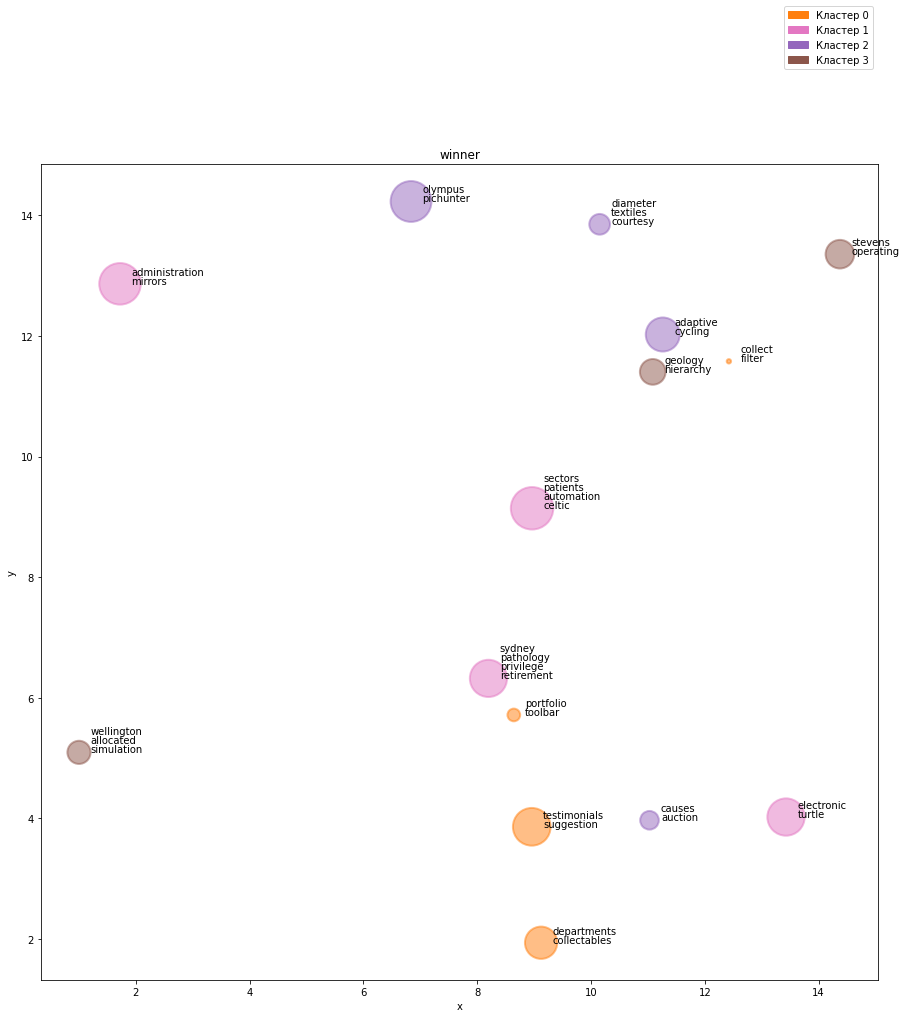

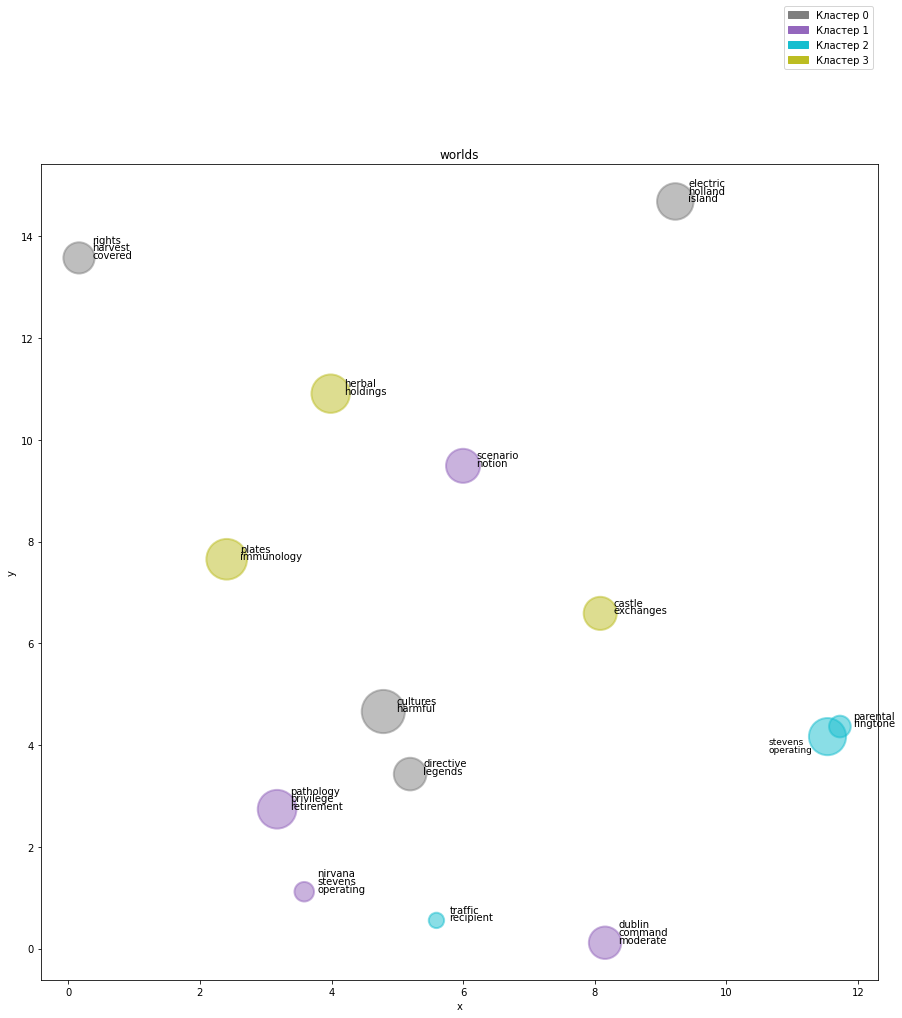

In [97]:
for a in areas:

  plt.figure(figsize=(15,15))

  cur_area = test_data.loc[test_data['area'] == a]
  cur_area.dropna(inplace = True, subset = ['x','y'])
  #добавляем точки с цветами и их количеством в виде размера
  plt.scatter(x = cur_area['x'], y = cur_area['y'], color = cur_area['color'], s = cur_area['count'], alpha = 0.5, linewidths = 2)
  
  x = list(cur_area['x'])
  y = list(cur_area['y'])
  word = list(cur_area['keyword'])
  xx=x.copy()
  yy=y.copy()
  #делим длинные словосочетания и добавляем их на диаграмму
  for i in range(len(x)):
    if len(word[i]) > 10:
      word_list = word[i].split()
    else :
      word_list = [word]

    cur_x = x[i]
    xx.remove(cur_x)
    cur_y = y[i]
    yy.remove(cur_y)

    check = 0
    for p1,p2 in zip([cur_x - item for item in xx], [cur_y - item for item in yy]):
      if abs(p1) < 0.5 and abs(p2) < 0.5:
        for j,w in enumerate(word_list):
          plt.text(cur_x - 0.9, cur_y - 0.3 + 0.15*j, w, fontsize=9)
        check = 1
        break
    if check == 0:
      for j,w in enumerate(word_list):
          plt.text(cur_x + 0.2, cur_y + 0.15*j, w, fontsize=10)
      
  plt.xlabel("x")
  plt.ylabel("y")

  #добавляем легенду
  patch = []
  for cluster in ['Кластер 0','Кластер 1','Кластер 2','Кластер 3']:
    colorr = list(cur_area.loc[cur_area['cluster_name'] == cluster]['color'])
    patch = patch + [mpatches.Patch(color=colorr[0], label = cluster)]

  plt.legend(handles=patch, bbox_to_anchor=(1, 1.2)) 
  plt.title(a)
  plt.show()